In [13]:
import cv2 as cv
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from math import copysign, log10

In [14]:
def preprocess(img):
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    img_green = img[:, :, 1]
    img = np.zeros(img.shape)
    img[:, :, 1] = img_green
    img = cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2GRAY)
    img = cv.GaussianBlur(img, (3,3), 0)
    plt.figure()
    plt.imshow(img, 'gray')
    return img

In [15]:
def prepare_tile(img, x, y, size):
    tile = img[y:y+size, x:x+size]
    return tile    

In [34]:
def get_tile_data(tile, mask, x, y, size):
    moments = cv.moments(tile)
    hu_moments = cv.HuMoments(moments).flatten()
    moments = list(moments.values())
    m1, m2 = moments[0:2]     
    h1, h2 = hu_moments[0], hu_moments[1]
    color_mean = np.mean(tile)
    color_median = np.median(tile)
    result = mask[x+size//2, y+size//2] 
    return [color_mean, color_median, m1, m2, h1, h2, result] 

In [17]:
df = pd.DataFrame(columns=['color_mean', 'color_ median', 'm1', 'm2', 'h1', 'h2', 'result'])
print(df)

Empty DataFrame
Columns: [color_mean, color_ median, m1, m2, h1, h2, result]
Index: []


KeyboardInterrupt: 

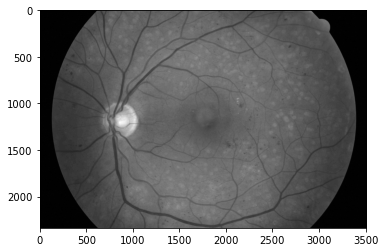

In [37]:
#generating train data
files = glob('images/*')
masks = glob('manual1/*')
train_photo_number = 5
tile_size = 5
i = 0
df = pd.DataFrame(columns=['color_mean', 'color_ median', 'm1', 'm2', 'h1', 'h2', 'result'])
for file, mask in zip(files, masks):
    img = cv.imread(file)
    mask_img = cv.imread(mask)
    mask_img = cv.cvtColor(mask_img, cv.COLOR_BGR2GRAY)
    img = preprocess(img)
    y_size, x_size = img.shape
    for x in range(0, x_size-tile_size, 3):
        for y in range(0,y_size-tile_size):
            tile = prepare_tile(img, x, y, tile_size)
            df_length = len(df)
            df.loc[df_length] = get_tile_data(tile, mask_img, x, y, tile_size)
    i+=1
    if(i >= train_photo_number):
        break
    df.to_csv(data.csv)

In [49]:
print(tile_size)

5
